# Capstone Project
This project will be to make a platform that will use machine learning to classify hand shapes that are used in ASL. 

Here are a few of the prerequisites required on your machine or virtual environment to get the projecy working:

* Python 3.8+
* Use PIP to install the following packages:
    * sklearn
    * PIL
    * numpy
    * imutils

## Data and Structures

The dataset used was downloaded from [Kaggle](https://www.kaggle.com/grassknoted/asl-alphabet).

Once the images are saved and extracted, we put it in the following structure:

```
+-- Dataset
|   +-- A
|   +-- B
|   +-- C
|   +-- D
|   +-- E
|   +-- F
|   +-- G
|   +-- H
|   +-- I
|   +-- J
|   +-- K
|   +-- L
|   +-- M
|   +-- N
|   +-- O
|   +-- P
|   +-- Q
|   +-- R
|   +-- S
|   +-- T
|   +-- U
|   +-- V
|   +-- W
|   +-- X
|   +-- Y
|   +-- Z
+-- Test
|   +-- A_test.jpg
|   +-- B_test.jpg
|   +-- C_test.jpg
|   +-- D_test.jpg
|   +-- E_test.jpg
|   +-- F_test.jpg
|   +-- G_test.jpg
|   +-- H_test.jpg
|   +-- I_test.jpg
|   +-- J_test.jpg
|   +-- K_test.jpg
|   +-- L_test.jpg
|   +-- M_test.jpg
|   +-- N_test.jpg
|   +-- O_test.jpg
|   +-- P_test.jpg
|   +-- Q_test.jpg
|   +-- R_test.jpg
|   +-- S_test.jpg
|   +-- T_test.jpg
|   +-- U_test.jpg
|   +-- V_test.jpg
|   +-- W_test.jpg
|   +-- X_test.jpg
|   +-- Y_test.jpg
|   +-- Z_test.jpg
+-- ML.ipynb
```

## Importing the packages. 

The first thing we need to do, after installing, is to import the packages

In [2]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import pickle
from IPython import display

## Notes

Because we are working with images, we need to split the image into its respective RGB color channels, and then create a feature vector with 6 values: *The mean and standard deviation for each of the 3 channels*.

In [3]:
# Function for changing the colorgrade
def extract_color_statistics(image):
    (R, G, B) = image.split()
    features = [np.mean(R), np.mean(G), np.mean(B), np.std(R), np.std(G), np.std(B)]

    return features

## Variables and data/labels

The cell below is where we will initialize our variables.

*dataset* - This is the path to our image folder
*imagePath* - Use the **imutils** import to set the path for our code
*data* - The data list will hold all our image *feature vectors*.
*labels* - The labels list will hold the corresponding labels

In [4]:
# Set and initialize variables for later use
dataset = "Dataset"
imagePaths = paths.list_images(dataset)
data = []
labels = []

## Our database

Now that we have our path set, it is time to run the images through our previous **extract_color_statistics** function.

The for loop will behave as such:

* Load the input image
* Compute and extract the channel stats
* Add the data to the **data** list
* Extract the label class from the path name
* Update the labels list

In [5]:
# loop over our input images
for imagePath in imagePaths:
    # Load the input image from disk
    image = Image.open(imagePath)
    # Extract the features
    features = extract_color_statistics(image)
    data.append(features)
    # extract the class label from the file path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

## Our labels

Now that the loop is completed, we need to encode our labels, converting them from strings to integers.

In [6]:
le = LabelEncoder()
labels = le.fit_transform(labels)

## Splitting our database

In machine learning, it is considered best practice to split a dataset between training, and testing. There is another phase, sometimes called **validation**, where the model is tested "by hand", but this will not be done at this stage. For our data, we are splitting our data into 75% for training and 25% for testing.


In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25)

## Training our model

Now, we are going to train our models using two different methods, ultimately choosing the one that provides the most accurate results on our database.

### KNN

The first ML model we are using is known as *k-Nearest Neighbor*(k-NN). This model is the most simple image classification algorithm. The algorithm relies on the distance between feature vectors, finding the most common class among the **k** closest examples.

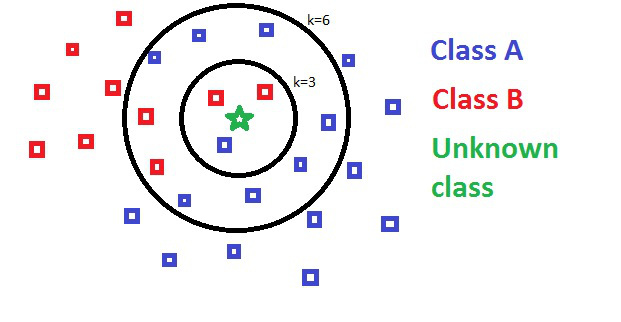

In [8]:
display.Image("KNN.jpeg")

Now, it is time to test our KNN model and see what type of results we get

In [9]:
# Initialize the model variable
knn = KNN(n_neighbors=1)

#Train the model
knn.fit(trainX, trainY)
predictions = knn.predict(testX)

## REPORT FOR KNN

In [10]:
print(classification_report(testY, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.93      0.92      0.93       721
           B       0.94      0.96      0.95       683
           C       0.95      0.95      0.95       757
           D       0.93      0.96      0.94       768
           E       0.95      0.94      0.94       776
           F       0.95      0.95      0.95       773
           G       0.96      0.95      0.96       744
           H       0.95      0.94      0.94       735
           I       0.95      0.98      0.96       708
           J       0.98      0.97      0.98       681
           K       0.96      0.98      0.97       774
           L       0.97      0.97      0.97       761
           M       0.96      0.96      0.96       781
           N       0.97      0.94      0.96       784
           O       0.99      0.95      0.97       736
           P       0.97      0.97      0.97       789
           Q       0.98      0.96      0.97       757
           R       0.96    

## KNN RESULTS

As we can see, our ML model had a 95% accuracy rate! If we look at the accuracy of each individual letter, the KNN model never drops below 90%. This is due in large part to our prior loop, which broke the images into its respective values.

## Random Forest Classifier

A second model we will be using is the **Random Forests** model. This model, to put it plainly, is a collection of decision trees. But unlike a hard-coded if/else, there is a *randomness* applied at 2 points in the algorithm.

* **Node Splits** - For each decision tree, the Random Forest will only give the decision tree a small portion of the possible features
* **Bootstrapping** - Each individual decision tree is trained on a bootstrapped samle from the original training data.

When it is time for the model to predict, each decision tree is queried and the algorithm tabulates the final results.

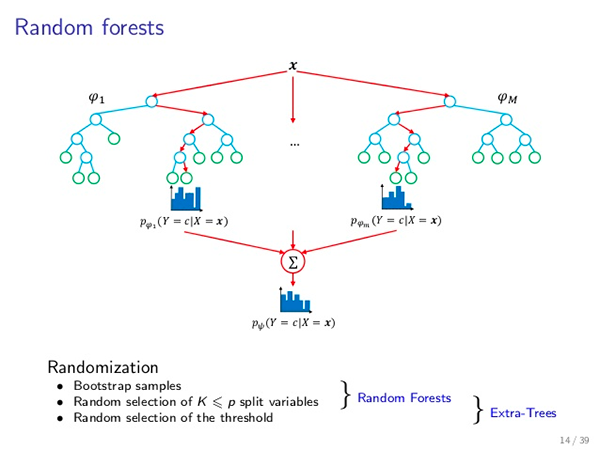

In [11]:
display.Image("Random_Forests.png")

Now, we will test our RFC model with our data and see how it compares to our KNN.

In [12]:
# Initialize the model variable
rf = RFC(n_estimators=100)

# Train the model
rf.fit(trainX, trainY)
predictions = rf.predict(testX)
print(classification_report(testY, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.89      0.85      0.87       721
           B       0.90      0.94      0.92       683
           C       0.90      0.93      0.91       757
           D       0.91      0.93      0.92       768
           E       0.93      0.91      0.92       776
           F       0.92      0.93      0.93       773
           G       0.93      0.93      0.93       744
           H       0.91      0.92      0.92       735
           I       0.92      0.97      0.94       708
           J       0.95      0.96      0.95       681
           K       0.94      0.95      0.94       774
           L       0.96      0.92      0.94       761
           M       0.95      0.95      0.95       781
           N       0.95      0.92      0.94       784
           O       0.96      0.94      0.95       736
           P       0.96      0.93      0.95       789
           Q       0.95      0.93      0.94       757
           R       0.94    